In [3]:
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  


In [4]:
print("NumPy :", np.__version__)
print("Pandas :", pd.__version__)


NumPy : 2.1.3
Pandas : 2.2.3


In [5]:
iris = load_iris()

In [6]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [7]:
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [8]:
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Taille et aperçu des données
print("Dimensions du jeu de données :", data.shape)
print("\nAperçu rapide :")
display(data.head())


Dimensions du jeu de données : (150, 5)

Aperçu rapide :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
display(data.describe())



Statistiques descriptives :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:

# Répartition des espèces
print("\nRépartition des espèces :")
print(data["species"].value_counts())


Répartition des espèces :
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


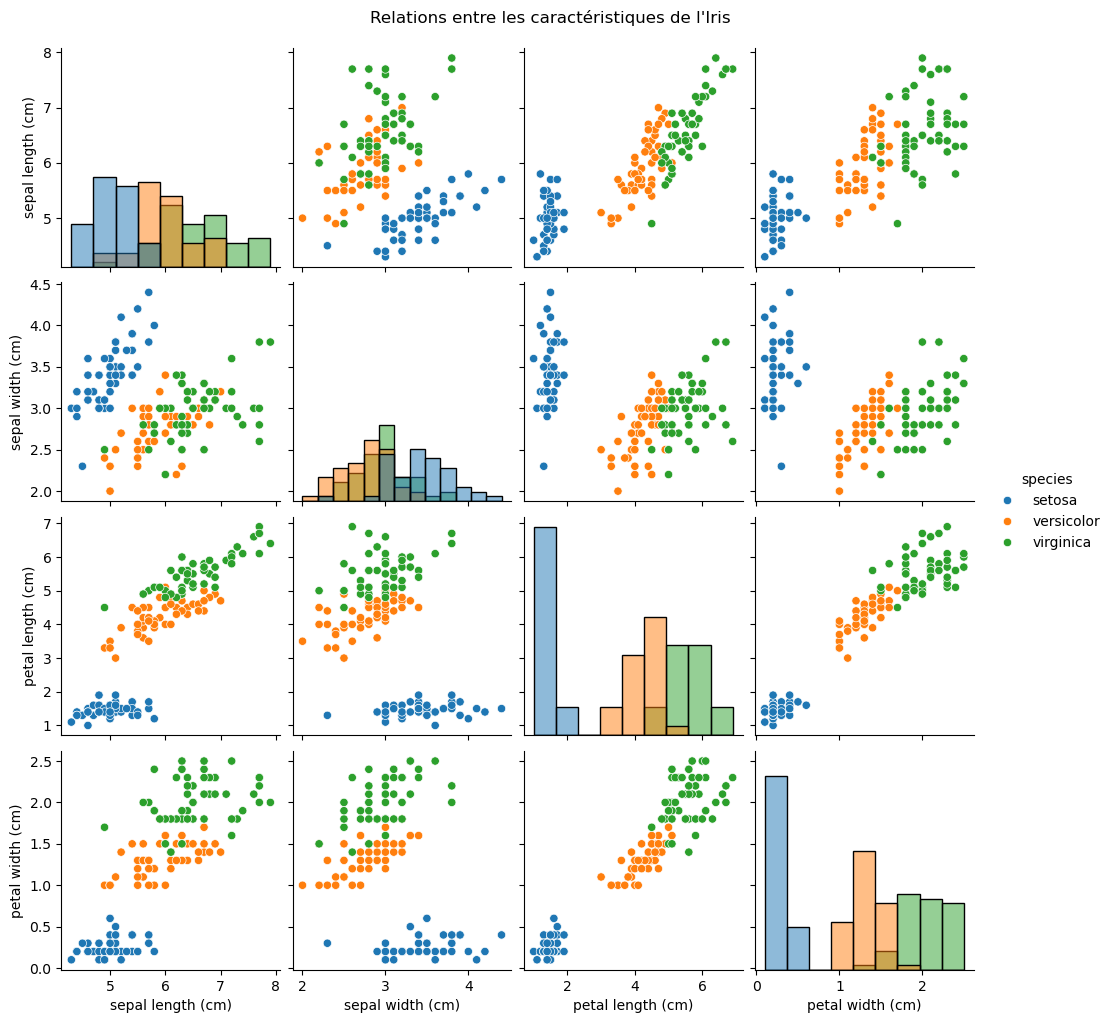

In [12]:
sns.pairplot(data, hue='species', diag_kind='hist')
plt.suptitle("Relations entre les caractéristiques de l'Iris", y=1.02)
plt.show()


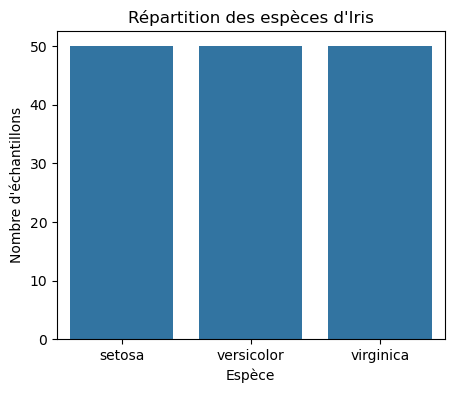

In [13]:
# Visualisation : distribution par espèce
plt.figure(figsize=(5,4))
sns.countplot(x="species", data=data)
plt.title("Répartition des espèces d'Iris")
plt.xlabel("Espèce")
plt.ylabel("Nombre d'échantillons")
plt.show()

In [18]:
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
print(X_train_scaled[:5])


[[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]


In [22]:
knn = KNeighborsClassifier(n_neighbors=5)


In [23]:
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test_scaled)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle KNN : {accuracy*100:.2f}%")



Précision du modèle KNN : 93.33%


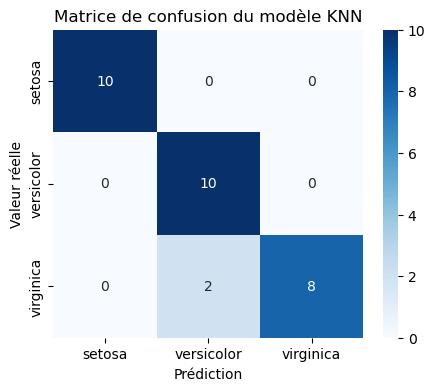

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matrice de confusion du modèle KNN")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()



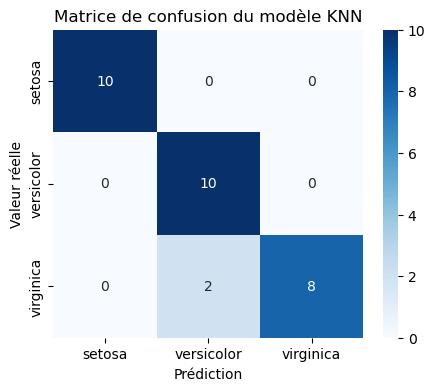

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matrice de confusion du modèle KNN")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()


In [30]:
resultats = pd.DataFrame({
    "Réel": y_test.values,
    "Prédit": y_pred     
})


In [31]:
resultats.to_csv("resultats/predictions_iris.csv", index=False)
print(" Fichier enregistré dans le dossier resultats/predictions_iris.csv")



 Fichier enregistré dans le dossier resultats/predictions_iris.csv
